# ENGS211 - Numerical Methods B || FINAL PROJECT

## Group Members: Ruzanna, Yeva, Mineh
## Topic: Face Recognition using PCA

###### Importing the libraries

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

###### Data Preparation

In [2]:
training_dataset = r'C:\Users\Acer\Downloads\Training'
testing_dataset = r'C:\Users\Acer\Downloads\Testing'

training_images = os.listdir(training_dataset)
testing_images = os.listdir(testing_dataset)

#We calculate the number of images in each directory
n_train = len(training_images)
n_test = len(testing_images)

width  = 128
height = 128
print(n_train, n_test)

25 40


###### Image Flattening

In [3]:
training_tensor = np.empty((len(training_images), height * width), dtype=np.float64) #Empty matrix for flattened training images

for i in range(len(training_images)):
    img = plt.imread(os.path.join(training_dataset, training_images[i]))
    training_tensor[i,:] = np.array(img, dtype='float64').flatten() #Adding vector images

###### Displaying the images

In [4]:
#A function to display images in a folder
def display(dataset, images, h, w, n_row=5, n_col=5):
    plt.figure(figsize=(1.5* n_col, 1.5* n_row))
    plt.subplots_adjust(bottom=0.1, left=0.05, right=0.95, top=0.95, hspace=0.4)
    for i in range(n_row * n_col):
        img = plt.imread(os.path.join(dataset, images[i]))
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')

Training Images

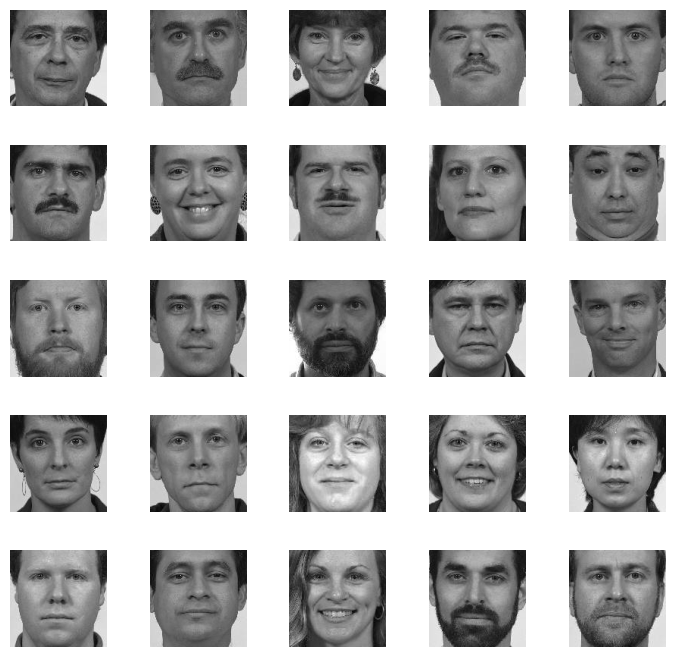

In [5]:
display(training_dataset, training_images, height, width)
plt.show()

Testing Images

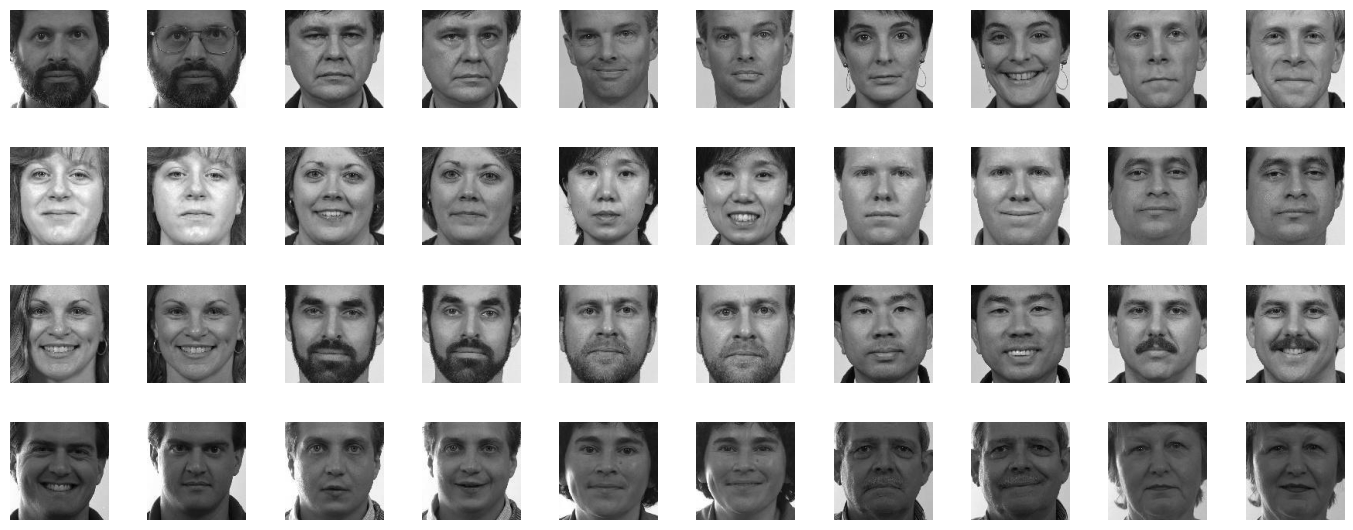

In [6]:
display(testing_dataset, testing_images, height, width, 4, 10)
plt.show()

###### Average Face Calculations

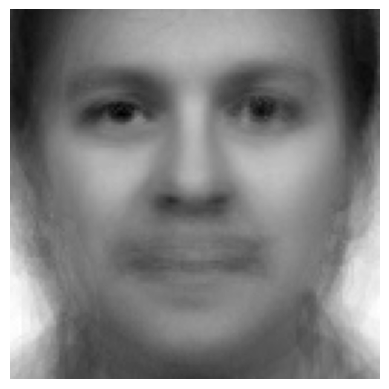

In [7]:
average_face = np.mean(training_tensor, axis=0)
plt.imshow(average_face.reshape(height, width), cmap='gray')
plt.axis('off')
plt.show()

###### PCA function

In [8]:
def PCA(X, n_train):
    
    #Normalizing the dataset
    X_normalized = X - average_face
    
    #Calculating the covariance matrix
    covariance_matrix = np.cov(X_normalized) / n_train
    
    #Finding its eigenvectors and eigenvalues
    eigenvalues, eigenvectors, = np.linalg.eig(covariance_matrix)
    
    #Sorting to find the most significant ones
    sorted_ind = np.argsort(eigenvalues)[::-1]
    eigvalues_sort = eigenvalues[sorted_ind]
    eigvectors_sort = eigenvectors[sorted_ind]
    
    #We don't know what this part is called but it works yay!
    reduced_data = np.array(eigvectors_sort[:n_train]).transpose()
    projected = np.dot(X_normalized.transpose(),reduced_data).transpose()
    weights = np.dot(X_normalized, projected.T) #we're calculating the weights here for convinience
    
    return projected, weights

In [9]:
proj_data, w = PCA(training_tensor, n_train)
proj_data.shape
w.shape

(25, 25)

###### Face Recognition Algorithm

Input face: 00770_960530_fa.jpg
Recognized face name: 00770_960530_fa.jpg


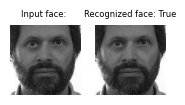

Input face: 00770_960530_fa_a.jpg
Recognized face name: 00806_941205_fa.jpg


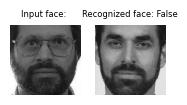

Input face: 00771_941205_fa.jpg
Recognized face name: 00771_941205_fa.jpg


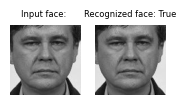

Input face: 00771_941205_fb.jpg
Recognized face name: 00771_941205_fa.jpg


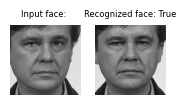

Input face: 00772_941201_fa.jpg
Recognized face name: 00772_941201_fa.jpg


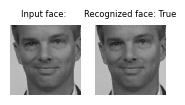

Input face: 00772_941201_fb.jpg
Recognized face name: 00772_941201_fa.jpg


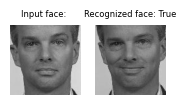

Input face: 00773_941201_fa.jpg
Recognized face name: 00773_941201_fa.jpg


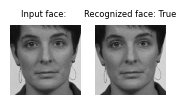

Input face: 00773_941201_fb.jpg
Recognized face name: 00773_941201_fa.jpg


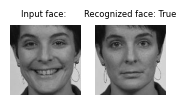

Input face: 00775_941205_fa.jpg
Recognized face name: 00775_941205_fa.jpg


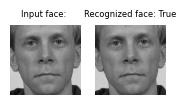

Input face: 00775_941205_fb.jpg
Recognized face name: 00775_941205_fa.jpg


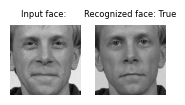

Input face: 00779_941205_fa.jpg
Recognized face name: 00779_941205_fa.jpg


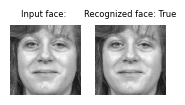

Input face: 00779_941205_fb.jpg
Recognized face name: 00779_941205_fa.jpg


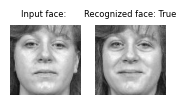

Input face: 00781_941205_fa.jpg
Recognized face name: 00781_941205_fa.jpg


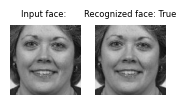

Input face: 00781_941205_fb.jpg
Recognized face name: 00781_941205_fa.jpg


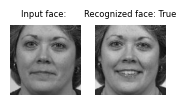

Input face: 00787_941205_fa.jpg
Recognized face name: 00787_941205_fa.jpg


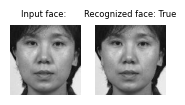

Input face: 00787_941205_fb.jpg
Recognized face name: 00787_941205_fa.jpg


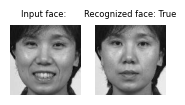

Input face: 00794_941205_fa.jpg
Recognized face name: 00794_941205_fa.jpg


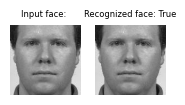

Input face: 00794_941205_fb.jpg
Recognized face name: 00794_941205_fa.jpg


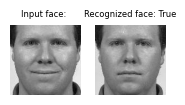

Input face: 00797_941205_fa.jpg
Recognized face name: 00797_941205_fa.jpg


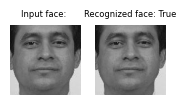

Input face: 00797_941205_fb.jpg
Recognized face name: 00797_941205_fa.jpg


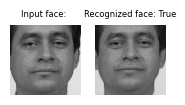

Input face: 00804_941205_fa.jpg
Recognized face name: 00804_941205_fa.jpg


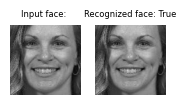

Input face: 00804_941205_fb.jpg
Recognized face name: 00804_941205_fa.jpg


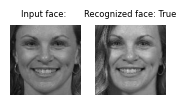

Input face: 00806_941205_fa.jpg
Recognized face name: 00806_941205_fa.jpg


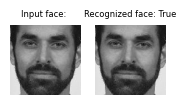

Input face: 00806_941205_fb.jpg
Recognized face name: 00806_941205_fa.jpg


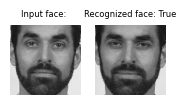

Input face: 00807_941205_fa.jpg
Recognized face name: 00807_941205_fa.jpg


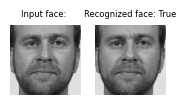

Input face: 00807_941205_fb.jpg
Recognized face name: 00750_941201_fa.jpg


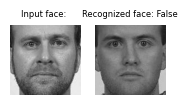

Input face: 00809_941205_fa.jpg
Recognized face name: 00794_941205_fa.jpg


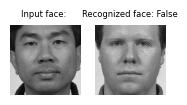

Input face: 00809_941205_fb.jpg
Recognized face name: 00794_941205_fa.jpg


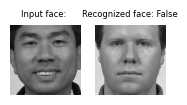

Input face: 00816_941205_fa.jpg
Recognized face name: 00761_941201_fa.jpg


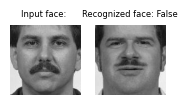

Input face: 00816_941205_fb.jpg
Recognized face name: 00794_941205_fa.jpg


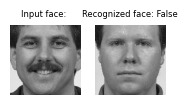

Input face: 00876_960530_fa.jpg
Recognized face name: 00770_960530_fa.jpg


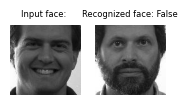

Input face: 00876_960530_fb.jpg
Recognized face name: 00773_941201_fa.jpg


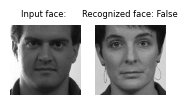

Input face: 00879_960530_fa.jpg
Recognized face name: 00772_941201_fa.jpg


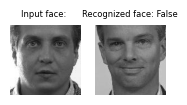

Input face: 00879_960530_fb.jpg
Recognized face name: 00772_941201_fa.jpg


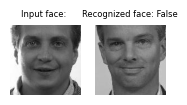

Input face: 00894_960530_fa.jpg
Recognized face name: 00747_941201_fa.jpg


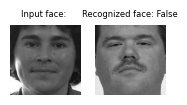

Input face: 00894_960530_fb.jpg
Recognized face name: 00758_941201_fa.jpg


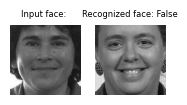

Input face: 00900_960530_fa.jpg
Recognized face name: 00772_941201_fa.jpg


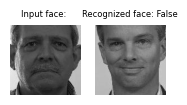

Input face: 00900_960530_fb.jpg
Recognized face name: 00772_941201_fa.jpg


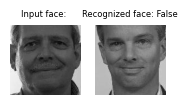

Input face: 00903_960530_fa.jpg
Recognized face name: 00761_941201_fa.jpg


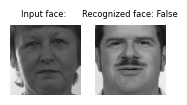

Input face: 00903_960530_fb.jpg
Recognized face name: 00744_941201_fa.jpg


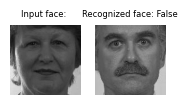

Number of correct matches: 24


In [10]:
def recognize_faces(testing_images, proj_data, w, training_images, threshold):
    
    num_testing_images = len(testing_images)
    count = 0

    for i in range(num_testing_images):
        
        #Preprocessing the testing image
        img = plt.imread(os.path.join(testing_dataset, testing_images[i]))
        testing_face = np.array(img, dtype='float64').flatten()
        testing_face_normalized = testing_face - average_face
        

        #Projecting the testing face onto proj_data
        testing_weights = np.dot(proj_data, testing_face_normalized)

        #Calculating the distances between the testing face and all training faces
        distances = np.linalg.norm(w - testing_weights, axis=1)
        
        #Finding the training face with the smallest distance
        closest_face_index = np.argmin(distances)
        min_distance = distances[closest_face_index]
        
        #Checking if the distance is below the threshold
        if min_distance <= threshold:
            correct = testing_images[i][:5] == training_images[closest_face_index][:5]
            if correct:
                count += 1  #Counting the number of correct matches
        else:
            correct = False
            
        recognized_face = training_images[closest_face_index]

        print("Input face:", testing_images[i])
        print("Recognized face name:", recognized_face)
        
        #Plotting input and recognized faces
        fig, axes = plt.subplots(1, 2, figsize=(2, 1))
        axes[0].imshow(img, cmap='gray')
        axes[0].set_title('Input face: ', fontsize=6)
        axes[0].axis('off')
                
        recognized_img = plt.imread(os.path.join(training_dataset, recognized_face))
        axes[1].imshow(recognized_img, cmap='gray')
        axes[1].set_title('Recognized face: ' + str(correct), fontsize=6)
        axes[1].axis('off')
        
        plt.show()
        
    return count

predicted_count = recognize_faces(testing_images, proj_data, w, training_images, 20000000)
print("Number of correct matches:", predicted_count)

<h1><center>Thank You!</center></h1>

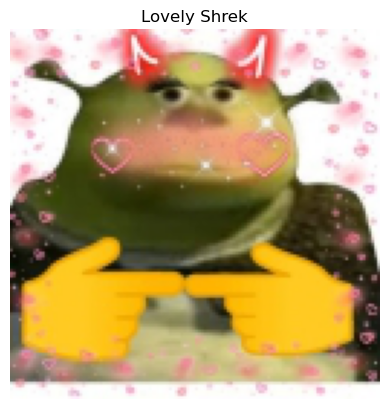

In [11]:
lovely_shrek = [r'C:\Users\Acer\Downloads\lovely_shrek.jpg']
lovely_shrek_img = plt.imread(lovely_shrek[0])

plt.imshow(lovely_shrek_img)
plt.axis('off')
plt.title('Lovely Shrek')
plt.show()